# sklearn 中的逻辑回归

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
np.random.seed(666)
X = np.random.normal(0, 1, size = (200, 2))
y = np.array(X[:,0]**2 + X[:,1] >= 1.5, dtype = 'int')
# 再给上述的数据加一些噪声
for _ in range(20):
    y[np.random.randint(200)] = 1


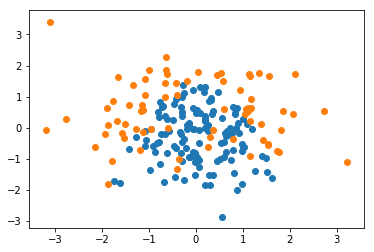

In [3]:
plt.scatter(X[y==0, 0], X[y==0, 1])
plt.scatter(X[y==1, 0], X[y==1, 1])
plt.show()

# 一,调用sklearn.linear_model.LogisticRegression 对数据进行分类

In [4]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y)
logistic_reg = LogisticRegression()
logistic_reg.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

注意上述的两个参数：   
C = 1（default）, Inverse of regularization strength; must be a positive float. Like in support vector machines, smaller values specify stronger regularization.    
penalty = 'l2',  str, ‘l1’ or ‘l2’, default: ‘l2’; Used to specify the norm used in the penalization. 即在正则化时是用的L1正则项,还是L2正则项.

In [5]:
# 在训练集上得到的模拟结果
logistic_reg.score(X_train, y_train)

0.68

In [6]:
#在测试集上预测的结果。
logistic_reg.score(X_test, y_test)

0.8

由于我们生成的数据集的边界是非线性的，故用线性的决策边界,得到的分类结果的准确率不是很高。

绘制决策边界，可视化分类效果

In [7]:
def plot_decision_boundary(model, axis):
    x0, x1 = np.meshgrid(
        np.linspace(axis[0], axis[1], int((axis[1]-axis[0])*100)),
        np.linspace(axis[3], axis[2], int((axis[3]-axis[2])*100))
    )
    x_new = np.c_[x0.ravel(), x1.ravel()]
    
    y_predict = model.predict(x_new)
    ss = y_predict.reshape(x0.shape)
    
    from matplotlib.colors import ListedColormap
    custom_cmap = ListedColormap(['#EF9A9A', '#FFF59D', '#90CAF9'])
    
    plt.contourf(x0, x1, ss, linewidth=5, cmap=custom_cmap)

/home/crystal/anaconda3/lib/python3.6/site-packages/matplotlib/contour.py:967: UserWarning: The following kwargs were not used by contour: 'linewidth'
  s)


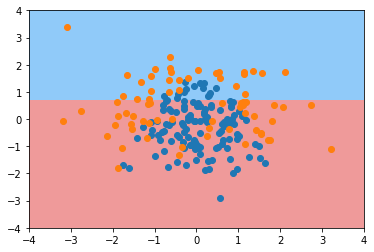

In [8]:
plot_decision_boundary(logistic_reg, axis = [-4, 4, -4, 4])
plt.scatter(X[y==0, 0], X[y==0, 1])
plt.scatter(X[y==1, 0], X[y==1, 1])
plt.show()

从上述的决策边界可以看出,logistic_reg 是一个非常糟糕的非类模型

# 二, 用Pipeline 设计ployLogisticRegression 对数据进行分类

# 1.在Pipeline中加入 degree 参数

In [9]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler


def ploy_logisticReg(degree):
    return Pipeline([("poly", PolynomialFeatures(degree=degree)),
                           ("std_scaler", StandardScaler()),
                          ("lin_reg", LogisticRegression())
                    ])
ployLogisticReg = ploy_logisticReg(degree = 2)
ployLogisticReg.fit(X_train, y_train)

Pipeline(memory=None,
     steps=[('poly', PolynomialFeatures(degree=2, include_bias=True, interaction_only=False)), ('std_scaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('lin_reg', LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False))])

In [10]:
ployLogisticReg.score(X_train, y_train)

0.8933333333333333

In [11]:
ployLogisticReg.score(X_test, y_test)

0.9

加入二次项后,分类的准确率是不是高了很多

绘制决策边界, 可视化分类效果

/home/crystal/anaconda3/lib/python3.6/site-packages/matplotlib/contour.py:967: UserWarning: The following kwargs were not used by contour: 'linewidth'
  s)


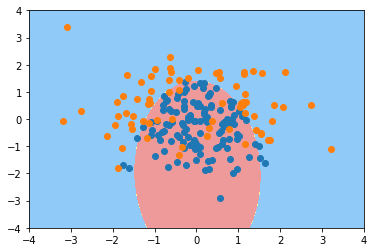

In [12]:
plot_decision_boundary(ployLogisticReg, axis = [-4, 4, -4, 4])
plt.scatter(X[y==0, 0], X[y==0, 1])
plt.scatter(X[y==1, 0], X[y==1, 1])
plt.show()

由于我们绘制的决策边界就是二阶的,所以,当degree = 2时, 即不过拟合, 也不欠你和.    
然而,在实际中, 我们并不知道数据的决策边界的阶数, 设置的阶数比实际决策边界的阶数高在所难免,即时常会发生过拟合的现象, 此时正则化就非常重要了    
所以, 我们在管道中调整C 的大小，来调整正则化的强度

# 2.在Pipeline中加入参数degree , C

In [13]:
def ploy_logisticReg1(degree, C):
    return Pipeline([("poly", PolynomialFeatures(degree=degree)),
                           ("std_scaler", StandardScaler()),
                          ("lin_reg", LogisticRegression(C=C))
                    ])

令degree = 20, C = 1

In [14]:
# 令C = 1（default）
ployLogisticReg1 = ploy_logisticReg1(degree = 20, C = 1)
ployLogisticReg1.fit(X_train, y_train)

Pipeline(memory=None,
     steps=[('poly', PolynomialFeatures(degree=20, include_bias=True, interaction_only=False)), ('std_scaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('lin_reg', LogisticRegression(C=1, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False))])

In [15]:
ployLogisticReg1.score(X_train, y_train)

0.9066666666666666

In [16]:
ployLogisticReg1.score(X_test, y_test)

0.94

degree = 20, 过拟合，但是分类的准确度反倒提高了,可能是由于我们的数据样本太少了   
可视化决策边界, 来看一下分类情况

/home/crystal/anaconda3/lib/python3.6/site-packages/matplotlib/contour.py:967: UserWarning: The following kwargs were not used by contour: 'linewidth'
  s)


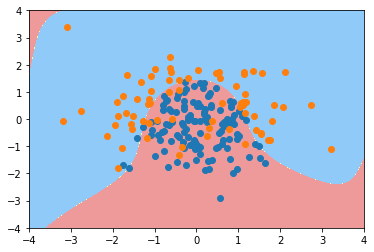

In [17]:
plot_decision_boundary(ployLogisticReg1, axis = [-4, 4, -4, 4])
plt.scatter(X[y==0, 0], X[y==0, 1])
plt.scatter(X[y==1, 0], X[y==1, 1])
plt.show()

决策边界上方有一个小角, 不是很规则, 很显然发生了过拟合, 但过拟合不是很明显

令degree = 20, C = 0.1 增强正则化的强度。

In [22]:
ployLogisticReg2 = ploy_logisticReg1(degree = 20, C = 0.1)
ployLogisticReg2.fit(X_train, y_train)

Pipeline(memory=None,
     steps=[('poly', PolynomialFeatures(degree=20, include_bias=True, interaction_only=False)), ('std_scaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('lin_reg', LogisticRegression(C=0.1, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False))])

In [23]:
ployLogisticReg2.score(X_train, y_train)


0.8333333333333334

In [24]:
ployLogisticReg2.score(X_test, y_test)

0.9

/home/crystal/anaconda3/lib/python3.6/site-packages/matplotlib/contour.py:967: UserWarning: The following kwargs were not used by contour: 'linewidth'
  s)


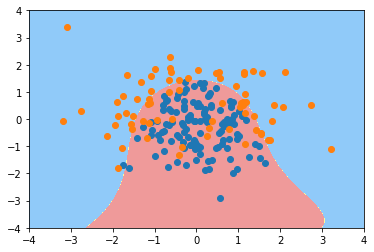

In [25]:
plot_decision_boundary(ployLogisticReg2, axis = [-4, 4, -4, 4])
plt.scatter(X[y==0, 0], X[y==0, 1])
plt.scatter(X[y==1, 0], X[y==1, 1])
plt.show()

加强正则化的强度后, 决策边界看起来是不是规则了很多

# 3.在Pipeline中加入参数degree , C(default,1), penalty = (default, 'l2')

In [26]:
def ploy_logisticReg2(degree, C, penalty):
    return Pipeline([("poly", PolynomialFeatures(degree=degree)),
                           ("std_scaler", StandardScaler()),
                          ("lin_reg", LogisticRegression(C=C, penalty=penalty))
                    ])

degree = 20, C = 1, penalty = 'l1'

In [28]:
ployLogisticReg3 = ploy_logisticReg2(degree = 20, C = 1, penalty = 'l1')
ployLogisticReg3.fit(X_train, y_train)

Pipeline(memory=None,
     steps=[('poly', PolynomialFeatures(degree=20, include_bias=True, interaction_only=False)), ('std_scaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('lin_reg', LogisticRegression(C=1, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l1', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False))])

In [29]:
ployLogisticReg3.score(X_train, y_train)

0.8866666666666667

In [31]:
ployLogisticReg3.score(X_test, y_test)

0.94

/home/crystal/anaconda3/lib/python3.6/site-packages/matplotlib/contour.py:967: UserWarning: The following kwargs were not used by contour: 'linewidth'
  s)


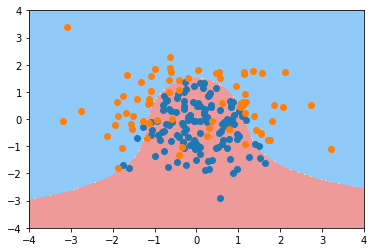

In [32]:
plot_decision_boundary(ployLogisticReg3, axis = [-4, 4, -4, 4])
plt.scatter(X[y==0, 0], X[y==0, 1])
plt.scatter(X[y==1, 0], X[y==1, 1])
plt.show()

degree = 20, C = 0.1, penalty = 'l1'

In [33]:
ployLogisticReg4 = ploy_logisticReg2(degree = 20, C = 0.1, penalty = 'l1')
ployLogisticReg4.fit(X_train, y_train)

Pipeline(memory=None,
     steps=[('poly', PolynomialFeatures(degree=20, include_bias=True, interaction_only=False)), ('std_scaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('lin_reg', LogisticRegression(C=0.1, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l1', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False))])

In [34]:
ployLogisticReg4.score(X_train, y_train)

0.8533333333333334

In [35]:
ployLogisticReg4.score(X_test, y_test)

0.88

/home/crystal/anaconda3/lib/python3.6/site-packages/matplotlib/contour.py:967: UserWarning: The following kwargs were not used by contour: 'linewidth'
  s)


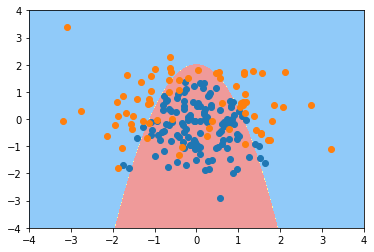

In [36]:
plot_decision_boundary(ployLogisticReg4, axis = [-4, 4, -4, 4])
plt.scatter(X[y==0, 0], X[y==0, 1])
plt.scatter(X[y==1, 0], X[y==1, 1])
plt.show()